Optimized parameters for double Gaussian: mu1 = 2.2432761037769673, sigma1 = 0.5813764337101636, amplitude1 = 0.22573113701093697, mu2 = 2.77237328516302, sigma2 = 0.306880877076624, amplitude2 = 0.07969271666845494


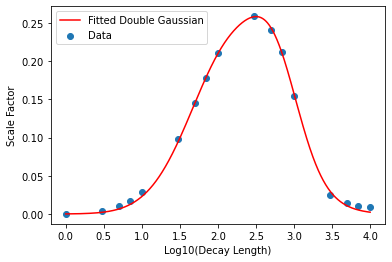

Chi-squared: 10.472213404434477
Degrees of freedom: 11
Reduced chi-squared: 0.9520194004031343
Uncertainties: mu1 = 0.09405515405906456, sigma1 = 0.047897566464463956, amplitude1 = 0.018321454901751834, mu2 = 0.02036047537557482, sigma2 = 0.05485684993729274, amplitude2 = 0.04380199990616184


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the double Gaussian function
def double_gaussian(x, mu1, sigma1, amplitude1, mu2, sigma2, amplitude2):
    gaussian1 = amplitude1 * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
    gaussian2 = amplitude2 * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    return gaussian1 + gaussian2

DecayEff_M0p3_300 = {
    1: 0.000212707, 3: 0.00367283, 5: 0.00985236, 7: 0.0172625,
    10: 0.0291508, 30: 0.098065, 50: 0.145035, 70: 0.17793, 100: 0.210862,
    300: 0.258932, 500: 0.241418, 700: 0.212747, 1000: 0.154672,
    3000: 0.0245574, 5000: 0.0140187, 7000: 0.0109439, 10000: 0.00906553
}

x_data = np.array(list(DecayEff_M0p3_300.keys()))
y_data = np.array(list(DecayEff_M0p3_300.values()))

x_data_log = np.log10(x_data)

initial_guess = [
    np.mean(x_data_log) - 0.5, 0.3, max(y_data) / 2, 
    np.mean(x_data_log) + 0.5, 0.3, max(y_data) / 2  
]

# Bounds for the parameters
bounds = (
    [min(x_data_log), 0, 0, min(x_data_log), 0, 0],  
    [max(x_data_log), np.inf, np.inf, max(x_data_log), np.inf, np.inf] 
)

# Weights for the data points
weights = 1 / y_data

popt, pcov = curve_fit(double_gaussian, x_data_log, y_data, p0=initial_guess, bounds=bounds, sigma=weights, method='trf', maxfev=10000)

print(f"Optimized parameters for double Gaussian: mu1 = {popt[0]}, sigma1 = {popt[1]}, amplitude1 = {popt[2]}, mu2 = {popt[3]}, sigma2 = {popt[4]}, amplitude2 = {popt[5]}")

plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit = double_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r', label='Fitted Double Gaussian')

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()

y_expected = double_gaussian(x_data_log, *popt)
residuals = y_data - y_expected
chi_squared = np.sum((residuals / y_expected) ** 2)
degrees_of_freedom = len(y_data) - len(popt)
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr = np.sqrt(np.diag(pcov))
print(f"Uncertainties: mu1 = {perr[0]}, sigma1 = {perr[1]}, amplitude1 = {perr[2]}, mu2 = {perr[3]}, sigma2 = {perr[4]}, amplitude2 = {perr[5]}")


Optimized parameters for double Gaussian: mu1 = 2.319889147345432, sigma1 = 0.5975091933375467, amplitude1 = 0.15668111141594693, mu2 = 2.7454439328571043, sigma2 = 0.775223517955555, amplitude2 = 0.1094605605570343


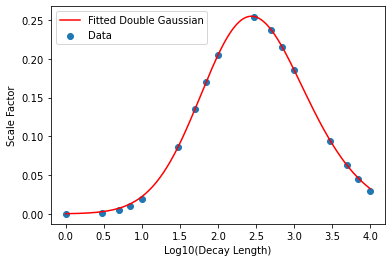

Chi-squared: 1.5188612338455758
Degrees of freedom: 11
Reduced chi-squared: 0.13807829398596144
Uncertainties: mu1 = 0.015380622702967145, sigma1 = 0.02230700556244899, amplitude1 = 0.03393716885583666, mu2 = 0.11763188282732841, sigma2 = 0.012287170541830678, amplitude2 = 0.030397069679587312


In [5]:
DecayEff_M0p3_3000 = {
    1: 3.19E-06,
    3: 0.00115684,
    5: 0.0048204,
    7: 0.0100535,
    10: 0.0195385,
    30: 0.0865576,
    50: 0.135586,
    70: 0.170079,
    100: 0.204531,
    300: 0.254481,
    500: 0.237463,
    700: 0.215004,
    1000: 0.185533,
    3000: 0.094442,
    5000: 0.0628719,
    7000: 0.0456011,
    10000: 0.0300701
}
x_data = np.array(list(DecayEff_M0p3_3000.keys()))
y_data = np.array(list(DecayEff_M0p3_3000.values()))

x_data_log = np.log10(x_data)

initial_guess = [
    np.mean(x_data_log) - 0.5, 0.3, max(y_data) / 2, 
    np.mean(x_data_log) + 0.5, 0.3, max(y_data) / 2  
]

# Bounds for the parameters
bounds = (
    [min(x_data_log), 0, 0, min(x_data_log), 0, 0],  
    [max(x_data_log), np.inf, np.inf, max(x_data_log), np.inf, np.inf] 
)

# Weights for the data points
weights = 1 / y_data

popt, pcov = curve_fit(double_gaussian, x_data_log, y_data, p0=initial_guess, bounds=bounds, sigma=weights, method='trf', maxfev=10000)

print(f"Optimized parameters for double Gaussian: mu1 = {popt[0]}, sigma1 = {popt[1]}, amplitude1 = {popt[2]}, mu2 = {popt[3]}, sigma2 = {popt[4]}, amplitude2 = {popt[5]}")

plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit = double_gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, 'r', label='Fitted Double Gaussian')

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()

y_expected = double_gaussian(x_data_log, *popt)
residuals = y_data - y_expected
chi_squared = np.sum((residuals / y_expected) ** 2)
degrees_of_freedom = len(y_data) - len(popt)
reduced_chi_squared = chi_squared / degrees_of_freedom
print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr = np.sqrt(np.diag(pcov))
print(f"Uncertainties: mu1 = {perr[0]}, sigma1 = {perr[1]}, amplitude1 = {perr[2]}, mu2 = {perr[3]}, sigma2 = {perr[4]}, amplitude2 = {perr[5]}")


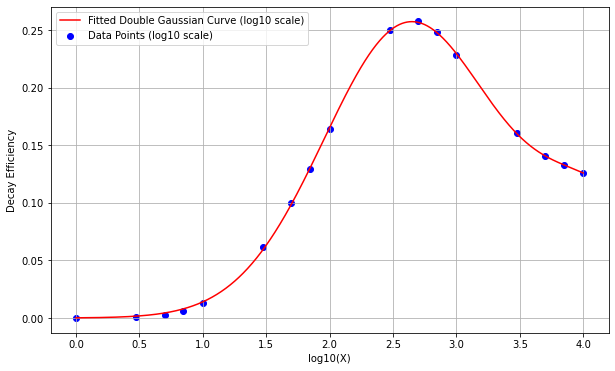

First Gaussian: Amplitude = 0.25608 ± 0.00136, Mean = 2.63359 ± 0.01117, Standard Deviation = 0.67762 ± 0.00733
Second Gaussian: Amplitude = 0.09628 ± 0.00474, Mean = 4.14727 ± 0.05600, Standard Deviation = 0.52148 ± 0.05967
Chi-squared: 0.00724
Degrees of freedom: 11
Reduced chi-squared: 0.00066


In [20]:
x = np.array([1, 3, 5, 7, 10, 30, 50, 70, 100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000])
y = np.array([3.77E-06, 0.000629733, 0.00289072, 0.00647825, 0.0131938, 0.0614839, 0.0998057, 0.129796, 
              0.164053, 0.249964, 0.257718, 0.248426, 0.228888, 0.16045, 0.141178, 0.132671, 0.126259])
x_log10 = np.log10(x)

def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    return (amp1 * np.exp(-((x - mean1) ** 2) / (2 * stddev1 ** 2)) +
            amp2 * np.exp(-((x - mean2) ** 2) / (2 * stddev2 ** 2)))

popt_double, pcov_double = curve_fit(double_gaussian, x_log10, y, 
                                     p0=[0.2, 2.5, 0.5, 0.2, 3, 1])
x_fit_log10 = np.linspace(min(x_log10), max(x_log10), 1000)
y_fit_double = double_gaussian(x_fit_log10, *popt_double)
perr_double = np.sqrt(np.diag(pcov_double))
chi_squared = np.sum(((double_gaussian(x_log10, *popt_double) - y) ** 2) / y)

dof = len(x) - len(popt_double)
reduced_chi_squared = chi_squared / dof
plt.figure(figsize=(10, 6))
plt.scatter(x_log10, y, color='blue', label='Data Points (log10 scale)')
plt.plot(x_fit_log10, y_fit_double, color='red', label='Fitted Double Gaussian Curve (log10 scale)')
plt.xlabel('log10(X)')
plt.ylabel('Decay Efficiency')
plt.legend()
plt.grid(True)
plt.show()
print("First Gaussian: Amplitude = {:.5f} ± {:.5f}, Mean = {:.5f} ± {:.5f}, Standard Deviation = {:.5f} ± {:.5f}".format(
    popt_double[0], perr_double[0], popt_double[1], perr_double[1], popt_double[2], perr_double[2]))
print("Second Gaussian: Amplitude = {:.5f} ± {:.5f}, Mean = {:.5f} ± {:.5f}, Standard Deviation = {:.5f} ± {:.5f}".format(
    popt_double[3], perr_double[3], popt_double[4], perr_double[4], popt_double[5], perr_double[5]))
print("Chi-squared: {:.5f}".format(chi_squared))
print("Degrees of freedom: {}".format(dof))
print("Reduced chi-squared: {:.5f}".format(reduced_chi_squared))


Gaussian parameters: mu = 2.6893803321577807, sigma = 0.7105073307542275, amplitude = 0.2590106449155585
f(x) = 0.38833645772731773 * exp(-0.5 * ((x - 1639.461527898468) / -900.585535235105)**2)


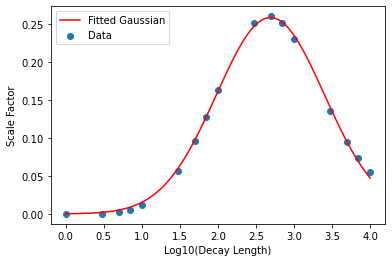

Chi-squared: 2.2591906477007133
Degrees of freedom: 14
Reduced chi-squared: 0.16137076055005095
Gaussian uncertainties: mu = 0.00678554160443192, sigma = 0.006271451526905416, amplitude = 0.00201354924809146


In [9]:
DecayEff_M0p5_5000 = {1: 3.33E-08, 3: 0.000327521, 5: 0.00226438, 7: 0.00549864, 10: 0.0114807, 30: 0.0572667, 50: 0.0968001, 70: 0.12804, 100: 0.163598, 300: 0.252375, 500: 0.260743, 700: 0.251347, 1000: 0.230423, 3000: 0.135273, 5000: 0.0950152, 7000: 0.0733655, 10000: 0.0548025}

x_data = np.array(list(DecayEff_M0p5_5000.keys()))
y_data = np.array(list(DecayEff_M0p5_5000.values()))

x_data_log = np.log10(x_data)
initial_guess = [x_data[np.argmax(y_data)], np.std(x_data), max(y_data)]
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=initial_guess, maxfev=10000)
x_data_log = np.log10(x_data)
initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)


print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")

plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)

residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))
print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 3.003761229390494, sigma = 0.7432050540813934, amplitude = 0.25744077524833203
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


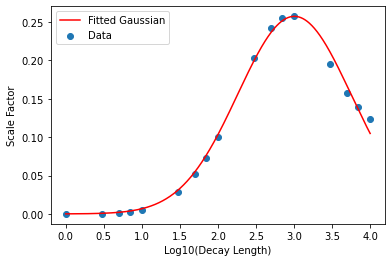

Chi-squared: 1.424615321999575
Degrees of freedom: 14
Reduced chi-squared: 0.10175823728568392
Gaussian uncertainties: mu = 0.013365150803119945, sigma = 0.014162139941680996, amplitude = 0.003956977290393738


In [5]:
data = {1: 1.59E-06, 3: 0.000436579, 5: 0.00146078, 7: 0.00281546, 10: 0.00531544, 30: 0.0280819, 50: 0.0518268, 70: 0.0731419, 100: 0.100674, 300: 0.20359, 500: 0.241852, 700: 0.255632, 1000: 0.25756, 3000: 0.195259, 5000: 0.158016, 7000: 0.138829, 10000: 0.123611}

x_data = np.array(list(data.keys()))
y_data = np.array(list(data.values()))

x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)


print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)

residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 2.958151888604483, sigma = 0.6934206893603061, amplitude = 0.26388984623459755
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


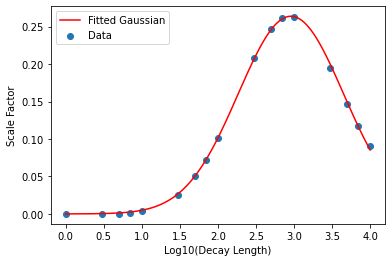

Chi-squared: 2.3899803294867796
Degrees of freedom: 14
Reduced chi-squared: 0.1707128806776271
Gaussian uncertainties: mu = 0.0038410692012095407, sigma = 0.00379518615740655, amplitude = 0.0012193843905706776


In [6]:
data = {1: 3.43E-10, 3: 6.03E-05, 5: 0.000552854, 7: 0.00144642, 10: 0.00322973, 30: 0.0247581, 50: 0.0500272, 70: 0.0725855, 100: 0.101274, 300: 0.207775, 500: 0.247514, 700: 0.261634, 1000: 0.263282, 3000: 0.194883, 5000: 0.14726, 7000: 0.117929, 10000: 0.0907816}

x_data = np.array(list(data.keys()))
y_data = np.array(list(data.values()))

x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)



print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)

residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 3.19730526181412, sigma = 0.6853087639976108, amplitude = 0.25514396372840475
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


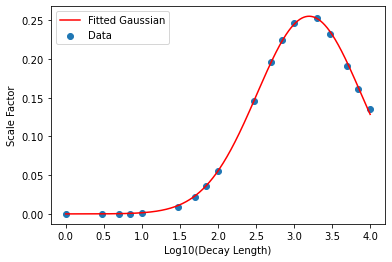

Chi-squared: 3.5582538397401766
Degrees of freedom: 15
Reduced chi-squared: 0.2372169226493451
Gaussian uncertainties: mu = 0.004325992699704977, sigma = 0.0052837547948375975, amplitude = 0.0013278308747178332


In [7]:
data = {1: 2.54E-13, 3: 2.08E-06, 5: 4.82E-05, 7: 0.0002002, 10: 0.000650378, 30: 0.00906239, 50: 0.0218598, 70: 0.0354108, 100: 0.0548716, 300: 0.146233, 500: 0.196283, 700: 0.225008, 1000: 0.246836, 2000: 0.252473, 3000: 0.232328, 5000: 0.190787, 7000: 0.161788, 10000: 0.135619}

x_data = np.array(list(data.keys()))
y_data = np.array(list(data.values()))

x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)



print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)
residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 3.1833467012268177, sigma = 0.6954411400421052, amplitude = 0.2514314698885856
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


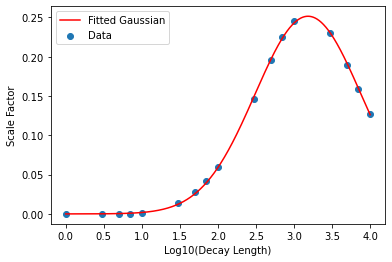

Chi-squared: 3.607790044067163
Degrees of freedom: 14
Reduced chi-squared: 0.2576992888619402
Gaussian uncertainties: mu = 0.002972008218693789, sigma = 0.003765332685048076, amplitude = 0.0010115993378595235


In [8]:
data = {1: 5.36E-17, 3: 4.29E-07, 5: 3.50E-05, 7: 0.000232487, 10: 0.000989261, 30: 0.013645, 50: 0.0280934, 70: 0.0412442, 100: 0.059097, 300: 0.14649, 500: 0.196192, 700: 0.224438, 1000: 0.245474, 3000: 0.229871, 5000: 0.189518, 7000: 0.159104, 10000: 0.127579}

x_data = np.array(list(data.keys()))
y_data = np.array(list(data.values()))

x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)



print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)
residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 3.1833467012268177, sigma = 0.6954411400421052, amplitude = 0.2514314698885856
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


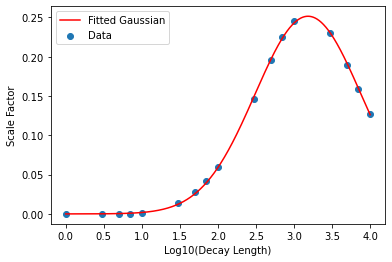

Chi-squared: 3.607790044067163
Degrees of freedom: 14
Reduced chi-squared: 0.2576992888619402
Gaussian uncertainties: mu = 0.002972008218693789, sigma = 0.003765332685048076, amplitude = 0.0010115993378595235


In [9]:
x_data = [1, 3, 5, 7, 10, 30, 50, 70, 100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000]
y_data = [7.72E-22, 6.34E-09, 1.93E-06, 2.08E-05, 0.000122248, 0.00386146, 0.011704, 0.0212436, 0.0362698, 0.117752, 0.168509, 0.200698, 0.228747, 0.239329, 0.20582, 0.178628, 0.151509]


x_data = np.array(list(data.keys()))
y_data = np.array(list(data.values()))

x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)



print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)
residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 3.2852969933364284, sigma = 0.6695706570373475, amplitude = 0.25329936416896237
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


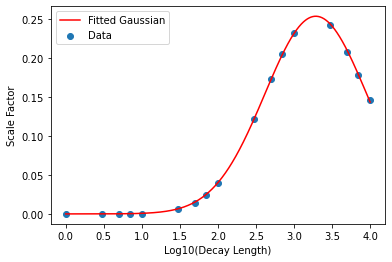

Chi-squared: 4.412734994019004
Degrees of freedom: 14
Reduced chi-squared: 0.3151953567156432
Gaussian uncertainties: mu = 0.002006619334045155, sigma = 0.0027950477332560858, amplitude = 0.0007445436864893926


In [10]:
x_data = [1, 3, 5, 7, 10, 30, 50, 70, 100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000]
y_data = [6.38E-24, 1.66E-09, 1.28E-06, 2.28E-05, 0.000196286, 0.00585752, 0.0143705, 0.0240373, 0.0392737, 0.122177, 0.172873, 0.204767, 0.232418, 0.241803, 0.207522, 0.178299, 0.146031]
x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)



print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)
residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")

Gaussian parameters: mu = 2.4627125477779295, sigma = 0.7131583201858769, amplitude = 0.25448153283373437
f(x) = 0.27434788732162635 * exp(-0.5 * ((x - 543.9806811792834) / -334.5791813614135)**2)


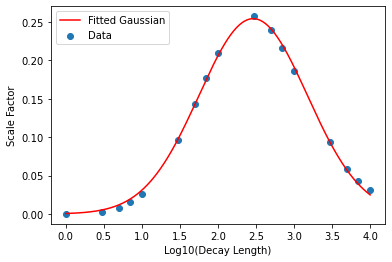

Chi-squared: 1.258888614422563
Degrees of freedom: 14
Reduced chi-squared: 0.08992061531589736
Gaussian uncertainties: mu = 0.006655087882882291, sigma = 0.0069815050445962675, amplitude = 0.002113601743563376


In [11]:
x_data = [1, 3, 5, 7, 10, 30, 50, 70, 100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000]
y_data = [0.0001006, 0.0025426, 0.0080044, 0.0150262, 0.0266662, 0.0960547, 
                          0.143494, 0.176623, 0.209753, 0.257636, 0.239831, 0.216861, 
                          0.186889, 0.0931888, 0.0591638, 0.0432097, 0.0318571]
x_data_log = np.log10(x_data)

initial_guess_gaussian = [np.mean(x_data_log), np.std(x_data_log), max(y_data)]
initial_guess_sigmoid = [max(y_data), np.median(x_data_log), 1, min(y_data)]

popt_gaussian, pcov_gaussian = curve_fit(gaussian, x_data_log, y_data, p0=initial_guess_gaussian, maxfev=10000)



print(f"Gaussian parameters: mu = {popt_gaussian[0]}, sigma = {popt_gaussian[1]}, amplitude = {popt_gaussian[2]}")


plt.scatter(x_data_log, y_data, label='Data')

x_fit = np.linspace(min(x_data_log), max(x_data_log), 1000)
y_fit_gaussian = gaussian(x_fit, *popt_gaussian)
plt.plot(x_fit, y_fit_gaussian, 'r', label='Fitted Gaussian')
print(f"f(x) = {popt[2]} * exp(-0.5 * ((x - {popt[0]}) / {popt[1]})**2)")

plt.xlabel('Log10(Decay Length)')
plt.ylabel('Scale Factor')
plt.legend()
plt.show()
y_expected_gaussian = gaussian(x_data_log, *popt_gaussian)
residuals = y_data - y_expected_gaussian

chi_squared = np.sum((residuals / y_expected_gaussian) ** 2)

degrees_of_freedom = len(y_data) - len(popt_gaussian)

reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
perr_gaussian = np.sqrt(np.diag(pcov_gaussian))

print(f"Gaussian uncertainties: mu = {perr_gaussian[0]}, sigma = {perr_gaussian[1]}, amplitude = {perr_gaussian[2]}")